# Numerical Optimization: General Review
- Pol Riba \& Jordi Segura

## 1 - One Dimensional Case

We begin with the one dimensional case. Assume that x ∈ R and that f(x) = x^3 − 2x + 2.

### 1 - 
###### *Plot this function within the range x ∈ [−2, 2], for instance. For that purpose use thematplotlib from Python using the examples included within this document1.*


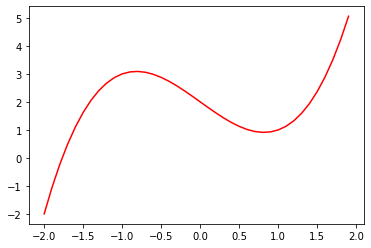

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import warnings
from mpl_toolkits.mplot3d import Axes3D
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

x = np.arange(-2, 2, 0.1)

def f(x):
    return x**3 - 2*x + 2

plt.plot(x,f(x), 'r')

### 2 - 
###### *Compute analytically the points x∗ that satisfy f'(x) = 0. Observe if the obtained result is congruent with the plot performed in the previous point.*

If we do the derivative of the function, we get:
$$f'(x) = 3x^2 - 2$$

Doing $f'(x) = 0$, we find two zeros $z_1 = \sqrt{\frac{2}{3}}$ and $z_2 = - \sqrt{\frac{2}{3}}$. We may check that these points correspond to the flat points in the plot above:

(0.816496580927726, -0.816496580927726)

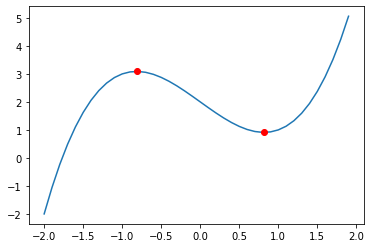

In [2]:
z1 = np.sqrt(2/3)
z2 = -np.sqrt(2/3)

plt.plot(x, f(x))
plt.plot(z1, f(z1), 'ro')
plt.plot(z2, f(z2), 'ro')
z1,z2

The obtained result (point) is congruent with the plot we have performed.

### 3 - 

###### *We are now going to check which of the latter points x∗ are a minimum (or a maximum). For that purpose let us perform a 2nd order Taylor expansion around point x*: f(x* + d) ≈ f(x*) + d f'(x*) + 1/2*d^2 f''(x*) (1) where d ∈ R is the perturbation around x*. Since we are dealing with a one dimensional function, f00(x∗) is a real number which may be positive or negative.  Equation (1) approximates the function f(x) around x* with a small value of d) using a quadratic function. The value of the second derivative will tell us whether the point x* is a minimum or a maximum.*
###### *In order for x* to be a minimum, you need f''(x*) to be positive. In other words, you need f''(x∗) to be convex at that point. This can be expressed in another way: you need d^2 f''(x∗) > 0 for any d != 0. Despite the trivial of the one dimensional case, this latter check becomes very much relevant at higher dimensions.*


If we want to check that $z_1$ is the minimum and $z_2$ is the maximum, we may use the second derivative:

$$ f''(x) = 6x $$

Let's calculate if these points are negative or positive:

In [3]:
def f1(x):
    return 3*x**2 -2
def f2(x):
    return 6*x

print(f"2nd derivative of the first zero {f2(z1)} > 0, therefore it's a minima")
print(f"2nd derivative of the second zero {f2(z2)} < 0, therefore it's a maxima")

2nd derivative of the first zero 4.898979485566356 > 0, therefore it's a minima
2nd derivative of the second zero -4.898979485566356 < 0, therefore it's a maxima


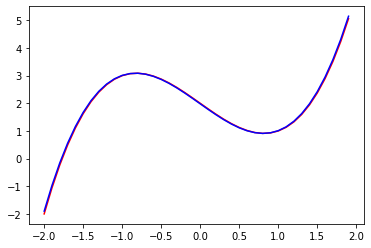

In [4]:
def Taylor(x, d):
    y = f(x) + d*f1(x) + d**2/2*f2(x)
    return y

d = 1e-2
plt.plot(x,f(x), 'r')
plt.plot(x, Taylor(x, d), 'blue')

We obtained that point 0.8165 is a minimum because 0 < 4.899(which is the second derivative).
We obtained that point -0.8165 is a maximum because 0 > -4.899(which is the second derivative).

### 4 -

###### *You may also plot f''(x) within the range x ∈ [−2, 2]. If f''(x) is positive, the function may be approximated with a convex 2nd order Taylor expansion at x. On the other hand, if f''(x) is negative the function is concave at that point.*

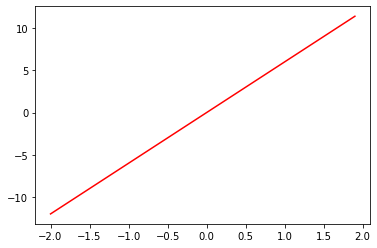

In [5]:
plt.plot(x,f2(x), 'r')


For positive values, the function may be approximated with a convex 2nd order Taylor expansion.
On the other hand, for negative values of  𝑥 , the function may be approximated with a concave 2nd order Taylor expansion at  𝑥.
Plot shows this graphically.

# Two dimensional Case
## A simple two-dimensional function

###### *We are now going to focus on simple two-dimensional functions, x ∈ R2, x = (x1, x2)^T (vectors areexpressed column-wise). Let us begin with the next quadratic expression f(x) = x1^2 + x2^2. Follow the next steps:*

### 1 -

###### *Plot this function. Please, note that this function has a minimum at (x1, x2) = (0, 0).* 

In [6]:
def f2d(x1, x2):
    return x1**2 + x2**2

x1 = np.arange(-20, 20, 0.1)
x2 = x1

In [7]:
def plot3d(x1,x2,f):  
    B, D = np.meshgrid(x1, x2)
    fig = plt.figure()
    ax = Axes3D(fig)
    ax.plot_surface(B, D, f(B, D))

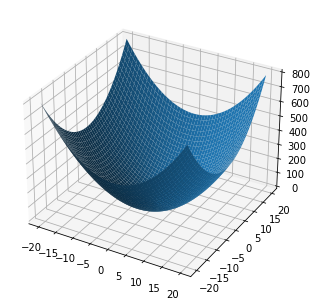

In [8]:
plot3d(x1,x2,f2d)

We can see that point (0,0) is the minimum.

### 2 -

###### *Analytically compute the gradient of the function, ∇f(x), and compute the point x* at which∇f(x*) = 0.*

The gradient of the function is defined as $\nabla f = (\frac{\partial f}{\partial x_1}, \frac{\partial f}{\partial x_2})$. Analytically, we get that the gradient is:

$$ \nabla f = (2x_1, 2x_2)$$ 

With two zeros in $x_1 = 0$ and $x_2 = 0$.

### 3 -

###### *Let d ∈ R2 be the perturbation around x*. The Taylor expansion, up to second order, of a function of several variables can be compactly expressed as f(x* + d) ≈ f(x*) + d^T ∇f(x*) + 1/2 d^T ∇^2 f(x*) d   (2).  Analyze the previous expression and be sure to understand the operations that are done at each of the terms. Compute the Hessian matrix, ∇2f(x), at the point x = x*. The latter matrix is giving us information about the shape of the quadratic approximation at x = x* in a similar way as has been done for the one dimensional case. For the one-dimensional case it is easy to check if we have a minimum, f''(x*) > 0, or a maximum, f''(x*) < 0. For a higher dimensional problem we are sure that the quadraticapproximation is convex and that we have a minimum if d^T ∇^2f(x*) d > 0 d != 0 (3). We have a maximum if d^T ∇^2 f(x*) d < 0, d != 0 (4). The previous conditions can be verified by computing the eigenvalues of ∇^2 f(x*). If all eigenvalues are strictly positive, equation (3) is satisfied. If all eigenvalues are strictly negative, equation (4) is satisfied. For this example, which are the eigenvalues of the Hessian matrix? Do we have a minimum or a maximum at x*?*

The Hessian $\nabla ^2 f$ in this case with $x_1$ and $x_2$ is defined as:
\begin{bmatrix}
  \frac{\partial f}{\partial x_1^2} & 
    \frac{\partial f}{\partial x_1 \partial x_2}\\[1ex] % <-- 1ex more space between rows of matrix
  \frac{\partial f}{\partial x_2 \partial x_1} & 
    \frac{\partial f}{\partial x_2^2}
\end{bmatrix}

Thus, we get:


\begin{bmatrix}
  2 & 
    0\\[1ex] % <-- 1ex more space between rows of matrix
  0 & 
    2
\end{bmatrix}


Being $A$ the Hessian matrix the eigenvalues of this, matrix are the values $\lambda = (\lambda_1, \lambda_2)$ such that $Av = \lambda v$, $\forall v \in \mathbb{R}^2$. So are the values such that satisfy:

$$ |A - \lambda I| = 0$$

\begin{vmatrix}
  2-\lambda & 
    0\\[1ex] % <-- 1ex more space between rows of matrix
  0 & 
    2 - \lambda
\end{vmatrix}

We end up with $\lambda_1$ = 2 and $\lambda_2$ = 2. All of them positives, therefore we have a minimum following the definition of (3). 


### 4 -

###### *The question that may arise know is: what happens if some eigenvalues are positive and somenegative? What happens if the eigenvalue is zero? For that issue you are asked to analyze thefollowing functions: fA(x) = −x1^2 − x2^2 fB(x) = x1^2 − x2^2  fC(x) = x1^2. You are recommended to draw the contour plot of the previous functions. Observe the shape they have. Then answer the following questions:*
###### *(a) Perform a plot of the function. At which point x* is the gradient zero?*
###### *(b) At the points where the gradient is zero, what kind of information is giving us the Hessian matrix? Is this a minimum? A maximum? None of both? You may use the eigvals function of Python to compute the eigenvalues of the Hessian matrix (i.e. there is no need to compute them analytically). In a similar way as for the one dimensional case, the eigenvalues of the Hessian ∇^2f(x) givesus information about the local shape of the function f(x) at point x. This information will be used by numerical methods to accelerate descent to the optimal point we are looking for! In this lab we will focus, however, on the optimal points.*

In [9]:
def fa(x1,x2):
    return -x1**2 -x2**2
def fb(x1,x2):
    return x1**2 -x2**2
def fc(x1,x2):
    return x1**2

In [10]:
# Contour plot
def contour_plot(x1,x2,f):
    # Creating 2-D grid of features
    [X, Y] = np.meshgrid(x1, x2)
    fig, ax = plt.subplots(1, 1)
    # plots contour lines
    ax.contourf(X, Y, f(X,Y))
    ax.set_title('Contour Plot')
    ax.set_xlabel('feature_x1')
    ax.set_ylabel('feature_x2')

    plt.show()

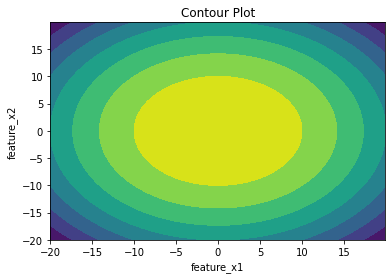

In [11]:
contour_plot(x1,x2,fa)

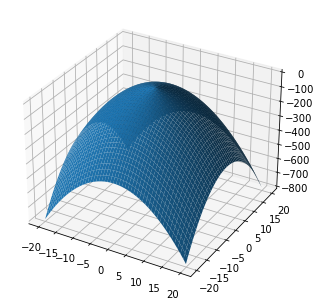

In [12]:
plot3d(x1,x2,fa)

It seems that at (0,0) our $\nabla f$ = 0

In [13]:
from sympy import *
x = Symbol('x')
dx1_A = -2*x
dx2_A = -2*x
print("Point x* which has gradient equal to 0 is ", solve(dx1_A)+ solve(dx2_A))

Point x* which has gradient equal to 0 is  [0, 0]


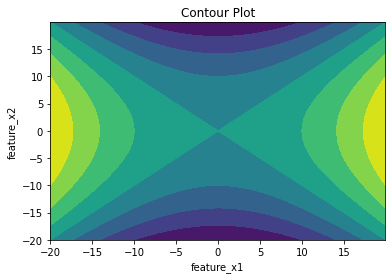

In [15]:
contour_plot(x1,x2,fb)

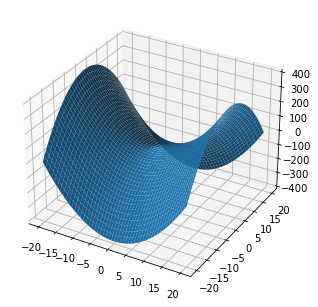

In [17]:
plot3d(x1,x2,fb)

It seems that at $\forall x$ our $\nabla f$ = 0

In [19]:
dx1_B = 2*x
dx2_B = -2*x
print("Point x* which has gradient equal to 0 is ", solve(dx1_B)+ solve(dx2_B))

Point x* which has gradient equal to 0 is  [0, 0]


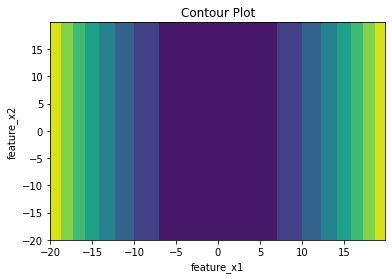

In [20]:
contour_plot(x1,x1,fc)

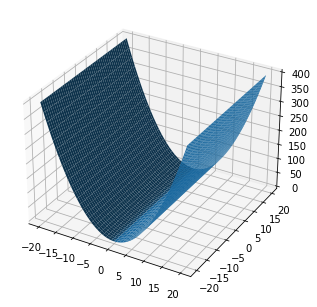

In [21]:
plot3d(x1,x1,fc)

It seems that at (0,0) our $\nabla f$ = 0

We will demonstrate the minimum analytically using the partial derivatives.

In [22]:
dx1_C = 2*x
dx2_C = 0
print("Point x* which has gradient equal to 0 is ", solve(dx1_C)+ solve(dx2_C))

Point x* which has gradient equal to 0 is  [0]


### 2.2.  A two dimensional function with multiple minima

###### *You are proposed to study the function that has been given in the lectures $f(x_1, x_2) = x_1^2(4 − 2.1 x_1^2 +\frac{x_1^4}{3}) + x_1x_2 + x_2^2(−4 + 4x_2^2)$*


### 1- 
###### *Plot the previous function within the range x1 ∈ [−2, 2] and x2 ∈ [−1, 1] using, for instance, a step of e.g. 0.1. Be sure that the plot is correct: just look at the plot of the lectures and compare them with the result you obtain. Observe where the minimums (and maximums) may be. There may be multiple minimums and maximums!*


In [23]:
def fd(x1,x2):
    return (x1**2)*(4-(2.1*(x1**2)) +((1/3)*(x1**4))) + x1*x2 + (x2**2)*(-4 + (4*(x2**2)))

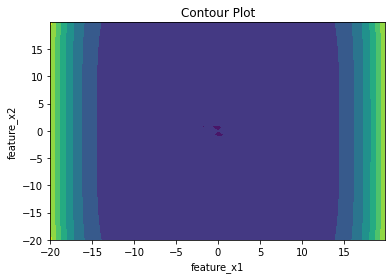

In [24]:
# Contour plot
def contour_plot(x1,x2,f):
    # Creating 2-D grid of features
    [X, Y] = np.meshgrid(x1, x2)
    fig, ax = plt.subplots(1, 1)
    # plots contour lines
    ax.contourf(X, Y, f(X,Y))
    ax.set_title('Contour Plot')
    ax.set_xlabel('feature_x1')
    ax.set_ylabel('feature_x2')
    x1 = np.linspace(start = -2 , stop = 2, num = 2000)
    x2 = np.linspace(start=-1, stop=1, num=2000)
    plt.show()

contour_plot(x1,x2,fd)

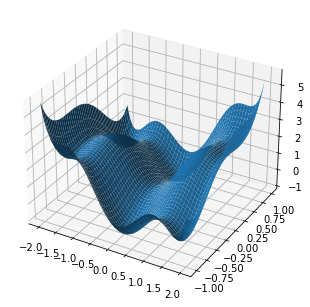

In [25]:
x1 = np.linspace(start = -2 , stop = 2, num = 2000)
x2 = np.linspace(start=-1, stop=1, num=2000)
plot3d(x1,x2,fd)

### - 2. 

###### *Analytically compute the gradient  $\nabla f(x)$*


Analytically, we get that the gradient is:  $\nabla f(x) = (2x_1^5 - 8.4x_1^3 + 8x_1 + x_2,  16x_2^3 - 8x_2 + x_1)$

### -3.

###### *Numerically compute an approximation of the points x' at which ∇f(x') = 0. For that issue:*

###### *(a) Evaluate ||$\nabla f(x)$ ||$^2$ at the previous range using a step of e.g. 0.005 or smaller if you prefer (but not too small!). You may create a matrix that stores all the latter values to be able to analyze them in the next steps.*

We printed the matrix to show the values of  ||$\nabla f(x)$ ||$^2$.

In [26]:
step_size = 0.005
X1 = np.arange(-2, 2, step_size)
X2 = np.arange(-1, 1, step_size)
n_x1 = (X1[-1]-(X1[0]))/step_size
n_x2 = (X2[-1]-(X2[0]))/step_size
N_G = np.zeros([int(n_x1),int(n_x2)])

for i in range(0, int(n_x1)):    
    for j in range(0, int(n_x2)): 
        N_G[i,j] = (2*(X1[i]**5) -8.4*(X1[i]**3)+ 8*X1[i] + X2[j])**2 + (16*(X2[j]**3) -8*X2[j]+ X1[i])**2

print(N_G)

[[290.44       286.36550724 282.41597569 ... 166.95111254 168.87039728
  170.88970369]
 [281.25287051 277.18369845 273.23946373 ... 159.23591876 161.16045293
  163.18503241]
 [272.43049364 268.36658803 264.42759587 ... 151.86398876 153.79371809
  155.82351638]
 ...
 [140.08352051 137.82937754 135.68121118 ... 232.57631606 236.25928299
  240.06106539]
 [146.4750788  144.22604266 142.08295925 ... 240.35511522 244.0431177
  247.84995929]
 [153.17515279 150.93127616 148.79332839 ... 248.46328984 252.15638055
  255.96833402]]


We printed the matrix to show the values of  ||$\nabla f(x)$ ||$^2$.

###### *(b) Using brute force, search for those points x˜ within the previous range at which the value of ||∇f(x)||^2 is strictly smaller than the value of its 8 neighbors^2. Our purpose here is to find the those points at which the gradient is small. We thus find all the “candidate”points that may be a minimum, a maximum or a saddle point!*


###### *(c) Which are the values of x˜ you have obtained? Which is the value of  ||∇f(x)||^2 at thosepoints?

Section b and c are answered at the same time in the next cell.

In [27]:
points = []
for i in range(1, int(n_x1-1)):     
    for j in range(1, int(n_x2-1)): 
        ### Search of its neighbors
        if (N_G[i,j]<N_G[i+1,j+1] and N_G[i,j]<N_G[i,j+1] and N_G[i,j]<N_G[i-1,j+1] and N_G[i,j]<N_G[i-1,j] and N_G[i,j]<N_G[i-1,j-1] and N_G[i,j]<N_G[i,j-1] and N_G[i,j]<N_G[i+1,j-1] and N_G[i,j]<N_G[i+1,j]):
            points.append((i,j)) # Store the point tupple.
for point in points:
    print(f" Point :=> {point}| Value of X_1 and X_2: {X1[point[0]]}{X2[point[1]]}| Value of the Norm of the Gradient :=> {N_G[point[0]][point[1]]} ")


 Point :=> (59, 359)| Value of X_1 and X_2: -1.70500000000000630.7950000000000017| Value of the Norm of the Gradient :=> 0.0014301678960873354 
 Point :=> (72, 154)| Value of X_1 and X_2: -1.6400000000000077-0.22999999999999932| Value of the Norm of the Gradient :=> 0.0006745825305698908 
 Point :=> (79, 86)| Value of X_1 and X_2: -1.6050000000000084-0.5699999999999996| Value of the Norm of the Gradient :=> 0.0004156534940928455 
 Point :=> (141, 79)| Value of X_1 and X_2: -1.295000000000015-0.6049999999999996| Value of the Norm of the Gradient :=> 4.5405036332579384e-05 
 Point :=> (154, 168)| Value of X_1 and X_2: -1.2300000000000164-0.15999999999999925| Value of the Norm of the Gradient :=> 0.00024181811612573458 
 Point :=> (178, 354)| Value of X_1 and X_2: -1.1100000000000190.7700000000000016| Value of the Norm of the Gradient :=> 0.0012559284739378034 
 Point :=> (382, 343)| Value of X_1 and X_2: -0.090000000000040710.7150000000000016| Value of the Norm of the Gradient :=> 0.0014

We printed all the candidate points, and its  ||∇f(x)||^2  value.

### 4- 
###### *Analytically compute the Hessian of f(x1, x2) and evaluate it at the values x˜ you have found. What kind of information is giving you the Hessian? Does it correspond to a minimum (the Hessian is positive definite)? To a maximum (the Hessian is negative definite)? Or may be a saddle point? You may use the eigvals function of Python to compute the eigenvalues ofthe Hessian matrix (i.e. there is no need to compute them analytically). Take into account that there may be several minimums, maximums and saddle points for the function you are analyzing.*

In [28]:
from numpy import linalg as LA

def H_matrix(x1,x2):
    return np.matrix([[10*(x1**4)-25.2*(x1**2)+8, 1], [1, 48*(x2**2)-8]])

mins = []
maxs = []
saddle = []

for p in points:
    hessian_res = H_matrix(X1[p[0]],X2[p[1]])
    lambda1, lambda2 = LA.eigvals(hessian_res)
    if lambda1>0 and lambda2>0:
        print(f"The point {X1[p[0]]},{ X2[p[1]]} is a minimum. Lambda1 => {lambda1} and {lambda2} => {lambda2}")
        mins.append((X1[p[0]],X2[p[1]]))
    elif lambda1<0 and lambda2<0:
        print(f"The point {X1[p[0]]},{ X2[p[1]]} is a maximum. Lambda1 => {lambda1} and {lambda2} => {lambda2}")
        maxs.append((X1[p[0]],X2[p[1]]))
    else:
        print(f"The point {X1[p[0]]},{ X2[p[1]]} is a saddle point. Lambda1 => {lambda1} and {lambda2} => {lambda2}")
        saddle.append((X1[p[0]],X2[p[1]]))
        

The point -1.7050000000000063,0.7950000000000017 is a minimum. Lambda1 => 18.955228027992213 and 22.63288547825863 => 22.63288547825863
The point -1.6400000000000077,-0.22999999999999932 is a saddle point. Lambda1 => 12.616878437472907 and -5.516116837472194 => -5.516116837472194
The point -1.6050000000000084,-0.5699999999999996 is a minimum. Lambda1 => 9.880749541580498 and 7.1576684646702 => 7.1576684646702
The point -1.295000000000015,-0.6049999999999996 is a saddle point. Lambda1 => -6.200314984966958 and 9.632613491217263 => 9.632613491217263
The point -1.2300000000000164,-0.15999999999999925 is a maximum. Lambda1 => -8.030504817825625 and -5.9771110821741775 => -5.9771110821741775
The point -1.110000000000019,0.7700000000000016 is a saddle point. Lambda1 => -7.903473507141616 and 20.494457607141708 => 20.494457607141708
The point -0.09000000000004071,0.7150000000000016 is a minimum. Lambda1 => 7.683608000857882 and 16.65172809914205 => 16.65172809914205
The point -4.2632564145606

In [29]:
mins

[(-1.7050000000000063, 0.7950000000000017),
 (-1.6050000000000084, -0.5699999999999996),
 (-0.09000000000004071, 0.7150000000000016),
 (0.08999999999995545, -0.7149999999999997),
 (1.6049999999999232, 0.5700000000000014),
 (1.704999999999921, -0.7949999999999998)]

We have 6 minimum relative points.

In [30]:
for (x1,x2) in mins:
    print(f"when x1 = {x1} and x2 = {x2} z is {fd(x1,x2)}")


when x1 = -1.7050000000000063 and x2 = 0.7950000000000017 z is -0.21543058477062094
when x1 = -1.6050000000000084 and x2 = -0.5699999999999996 z is 2.104275513364171
when x1 = -0.09000000000004071 and x2 = 0.7150000000000016 z is -1.031583601353
when x1 = 0.08999999999995545 and x2 = -0.7149999999999997 z is -1.031583601353
when x1 = 1.6049999999999232 and x2 = 0.5700000000000014 z is 2.10427551336417
when x1 = 1.704999999999921 and x2 = -0.7949999999999998 z is -0.21543058477062405


The global minimums are the following points (-1.7050000000000063, 0.7950000000000017) and (1.704999999999921 ,0.7949999999999998).


In [31]:
maxs

[(-1.2300000000000164, -0.15999999999999925),
 (1.2299999999999311, 0.16000000000000103)]

In [32]:
for (x1,x2) in maxs:
    print(f"when x1 = {x1} and x2 = {x2} z is {fd(x1,x2)}")


when x1 = -1.2300000000000164 and x2 = -0.15999999999999925 z is 2.4962773095629998
when x1 = 1.2299999999999311 and x2 = 0.16000000000000103 z is 2.496277309563


Both points are global maximum points.

In [33]:
saddle

[(-1.6400000000000077, -0.22999999999999932),
 (-1.295000000000015, -0.6049999999999996),
 (-1.110000000000019, 0.7700000000000016),
 (-4.263256414560601e-14, 8.881784197001252e-16),
 (1.1099999999999337, -0.7699999999999998),
 (1.2949999999999298, 0.6050000000000013),
 (1.6399999999999224, 0.2300000000000011)]

Saddle was shown in the last print.